In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['YaHei Consolas Hybrid']
plt.rcParams['axes.unicode_minus'] = False

from io import StringIO
import seaborn as sns

# import json

In [2]:
#t = json.loads('T2016.json', encoding='gb2312')
#df = pd.DataFrame.from_records(t['DS'])

#with open('T2015.txt', 'r', encoding='utf-8') as f:
    #contents = f.read().replace(' ', ';')
    #print(contents)
#df = pd.read_csv(StringIO(contents), sep=';', skiprows=[0])

dfs = []
for y in range(2016, 2020):
    dfs.append(pd.read_html('T%d.html'%y, encoding='utf-8',na_values=999999, keep_default_na=False)[0])#, flavor=['bs4']))

# ignore_index=True 去除原来的行索引
df = pd.concat(dfs, ignore_index=True)

In [3]:
for i,k in enumerate(df.columns):
    print(i,k)

0 站名
1 省份
2 地市
3 区县
4 乡镇
5 更正报标志
6 区站号(字符)
7 区站号(数字)
8 纬度(度)
9 经度(度)
10 测站高度(米)
11 气压传感器海拔高度(米)
12 测站级别
13 行政区代码
14 年(年)
15 月(月)
16 日(日)
17 平均气压(百帕)
18 最高气压(百帕)
19 最高气压出现时间
20 最低气压(百帕)
21 最低气压出现时间
22 平均海平面气压(百帕)
23 平均气温(摄氏度(℃))
24 最高气温(摄氏度(℃))
25 最高气温出现时间
26 最低气温(摄氏度(℃))
27 最低气温出现时间
28 平均水气压(百帕)
29 平均相对湿度(百分率)
30 最小相对湿度(百分率)
31 最小相对湿度出现时间
32 平均总云量(0.1)
33 平均低云量(0.1)
34 最小水平能见度(米)
35 最小水平能见度出现时间
36 1小时最大降水量(毫米)
37 日小时最大降水量出现时间
38 20-08时降水量(毫米)
39 08-20时降水量(毫米)
40 20-20时降水量(毫米)
41 08-08时降水量(毫米)
42 蒸发(毫米)
43 蒸发(大型)(毫米)
44 积雪深度(毫米)
45 雪压(千克/平方米)
46 电线积冰-现象
47 电线积冰-南北方向直径(毫米)
48 电线积冰-南北方向厚度(毫米)
49 电线积冰-南北方向重量(克)
50 电线积冰-东西方向直径(毫米)
51 电线积冰-东西方向厚度(毫米)
52 电线积冰-东西方向重量(克)
53 温度/气温(摄氏度(℃))
54 风向(度)
55 风速(米/秒)
56 2分钟平均风向(字符型)(度)
57 平均2分钟风速(米/秒)
58 平均10分钟风速(米/秒)
59 最大风速的风向(度)
60 最大风速(米/秒)
61 最大风速出现时间
62 极大风速的风向(度)
63 极大风速(米/秒)
64 极大风速出现时间
65 平均地面温度(摄氏度(℃))
66 最高地面温度(摄氏度(℃))
67 最高地面温度出现时间
68 最低地面温度(摄氏度(℃))
69 最低地面温度出现时间
70 平均5cm地温(摄氏度(℃))
71 平均10cm地温(摄氏度(℃))
72 平均15cm地温(摄氏度(℃))
73 平均20cm地温(摄氏度(℃))
7

In [4]:
fields_str = '''
7 区站号(数字)
14 年(年)
15 月(月)
16 日(日)
17 平均气压(百帕)
18 最高气压(百帕)
19 最高气压出现时间
20 最低气压(百帕)
21 最低气压出现时间
22 平均海平面气压(百帕)
23 平均气温(摄氏度(℃))
24 最高气温(摄氏度(℃))
25 最高气温出现时间
26 最低气温(摄氏度(℃))
27 最低气温出现时间
28 平均水气压(百帕)
29 平均相对湿度(百分率)
30 最小相对湿度(百分率)
31 最小相对湿度出现时间
34 最小水平能见度(米)
35 最小水平能见度出现时间
36 1小时最大降水量(毫米)
38 20-08时降水量(毫米)
39 08-20时降水量(毫米)
40 20-20时降水量(毫米)
41 08-08时降水量(毫米)
42 蒸发(毫米)
43 蒸发(大型)(毫米)
44 积雪深度(毫米)
57 平均2分钟风速(米/秒)
58 平均10分钟风速(米/秒)
59 最大风速的风向(度)
60 最大风速(米/秒)
61 最大风速出现时间
62 极大风速的风向(度)
63 极大风速(米/秒)
64 极大风速出现时间
65 平均地面温度(摄氏度(℃))
66 最高地面温度(摄氏度(℃))
67 最高地面温度出现时间
68 最低地面温度(摄氏度(℃))
69 最低地面温度出现时间
70 平均5cm地温(摄氏度(℃))
71 平均10cm地温(摄氏度(℃))
72 平均15cm地温(摄氏度(℃))
73 平均20cm地温(摄氏度(℃))
74 平均40cm地温(摄氏度(℃))
75 平均80cm地温(摄氏度(℃))
76 平均160cm地温(摄氏度(℃))
77 平均320cm地温(摄氏度(℃))
82 日照时数(时)
85 平均草面(雪面)温度(摄氏度(℃))
86 草面(雪面)最高温度(摄氏度(℃))
87 草面(雪面)最高温度出现时间
88 草面(雪面)最低温度(摄氏度(℃))
89 草面(雪面)最低温度出现时间
'''                                                                                                         

In [5]:
fields = []
for i, f in enumerate(fields_str.split()):
    if i%2 !=0:
        fields.append(f)

In [6]:
df = df[fields]
# df.to_csv('T2016.csv')

s = '42-0.6-0-0;999017-0-0-0;355-0.6-0-0;0-1.2-0-0;203-0.7-0-0;73-0.9-0-0;242-0.4-0-0;999017-0-0-0;65-0.9-0-0;229-0.9-0-0;328-0.7-0-0;65-0.9-0-0;204-1-0-0;311-1.6-0-0;42-0.5-0-0;999017-0.1-0-0;96-0.5-0-0;210-1-0-0;80-0.8-0-0;358-0.7-0-0;999017-0-0-0;194-1.6-0-0;38-1-0-0;66-1-0-0'
for i in s.split(';'):
    print(i)
t = 0
for i in s.split(';'):
    t += float(i.split('-')[1])
t/24

In [7]:
# 根据日期计算是年的第几天
def days_count(row):
    year,month,day = row
    
    count = 0
    #判断该年是平年还是闰年
    if year%400==0 or (year%4==0 and year%100!=0):    # 闰年
        li = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:    # 平年
        li = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        
    for i in range(month-1):
        count += li[i]
        
    return count+day

In [8]:
# 选择参与计算年第几日的三个字段
days =  df[['年(年)','月(月)', '日(日)']]
# 更新'日(日)'字段
df.loc[:, '日(日)'] = days.apply(days_count, axis=1)
# 删除'月(月)'字段
df.drop(['月(月)'], axis=1, inplace=True)

# 选择参与计算平均气温的四个字段
df_cal = df[['年(年)', '日(日)','最高气温(摄氏度(℃))','最低气温(摄氏度(℃))']]
# 按照'年(年)', '日(日)'计算平均气温
df_mean_T = df_cal.groupby(['年(年)','日(日)']).mean()

df_cal.set_index(['年(年)', '日(日)'],inplace=True)
df_T_delta = df_cal - df_mean_T

df_T_delta.columns = ['Max2T_delta', 'Min2T_delta']

df_T_delta.reset_index(inplace=True)
df_T_delta.drop(['年(年)', '日(日)'], axis=1, inplace=True)

data = pd.concat([df_T_delta, df], axis=1)
# data = data[(data.Max2T_delta.abs()>2) | (data.Min2T_delta.abs()>2)]

In [9]:
def plot_scatter_matrix(station_id):
    target = data[data['区站号(数字)'] == station_id]
    data_analysis = target.corr().iloc[:,:2].drop(['Max2T_delta','Min2T_delta', '区站号(数字)' ,'年(年)']).abs()
    top_related_min = (data_analysis.sort_values('Min2T_delta', ascending=False).iloc[:5])
    top_related_max = data_analysis.sort_values('Max2T_delta', ascending=False).iloc[:5]
    df_plot_min = pd.concat([target['Min2T_delta'], target[top_related_min.index]], axis=1)
    df_plot_max = pd.concat([target['Max2T_delta'], target[top_related_min.index]], axis=1)
    print(top_related_min.index)
    scatter_matrix(df_plot_min, figsize=(24, 24), diagonal='kde')
    print(top_related_max.index)
    scatter_matrix(df_plot_max, figsize=(24, 24), diagonal='kde')

Index(['最小水平能见度(米)', '最高地面温度(摄氏度(℃))', '草面(雪面)最高温度(摄氏度(℃))', '平均地面温度(摄氏度(℃))',
       '蒸发(大型)(毫米)'],
      dtype='object')
Index(['蒸发(大型)(毫米)', '最小水平能见度(米)', '极大风速(米/秒)', '最大风速(米/秒)', '平均2分钟风速(米/秒)'], dtype='object')


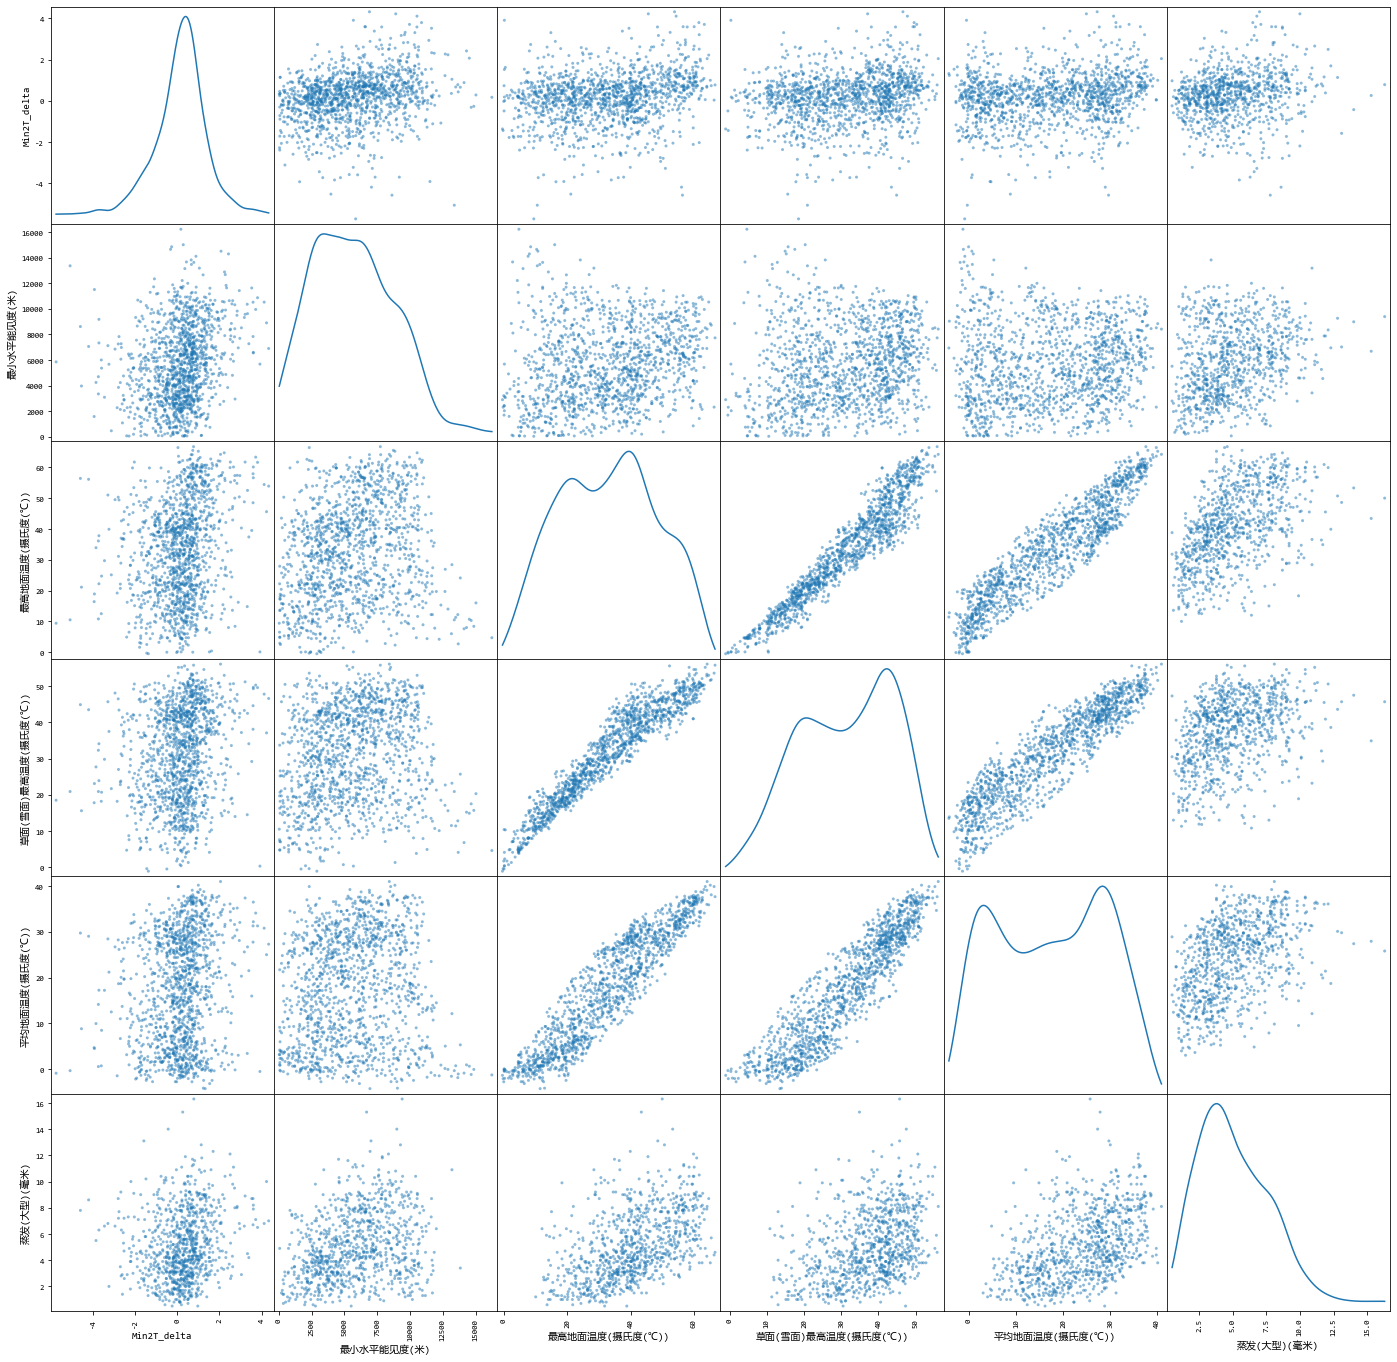

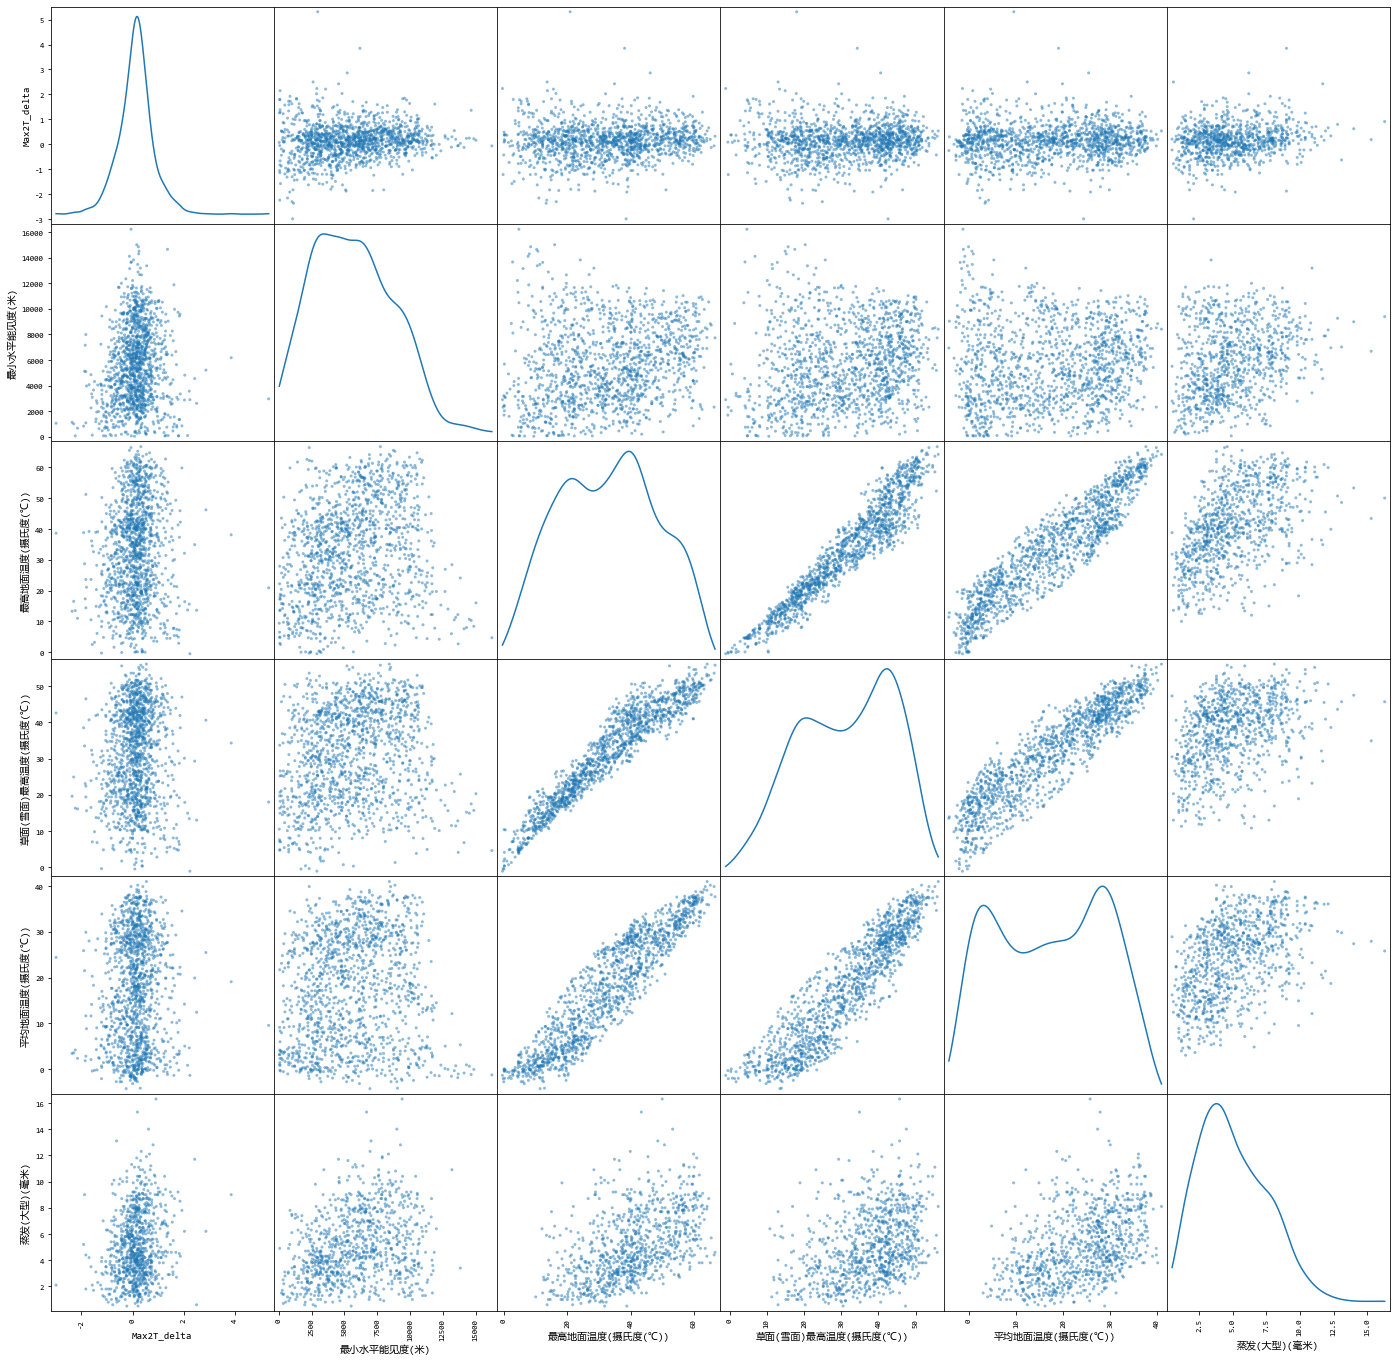

In [10]:
plot_scatter_matrix(53986)

In [11]:
t = pd.DataFrame({'A':[2,-4,5,1],'B':[4,5,6,1]})
t

,A,B
0,2,4
1,-4,5
2,5,6
3,1,1


In [12]:
t.A.abs() >3

0    False
1     True
2     True
3    False
Name: A, dtype: bool